# The Boston Housing Assess Dataset Analysis Project

Part III: Using Prepared Data to Train many models
In this Notebook, we use prepared data to train different models and compare their performances. 
The data used can be before or after feature selection work as well as from different years. 
Multi-year combined data are not tested yet. 

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pandas import read_csv

In [2]:
from time import time
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
myDataPath = 'M:\\Work\\Study\\WPI-DS\\CurrentCourse-DS504\\DataSets\\SelectedDataSet\\'
subFolder = 'BigDataset_Preprocess/'
fileName = 'BH_BigDataset_2020Full.csv'
outputFame = 'BH_BigDataset_2020Reduced.csv'
fileBigData = myDataPath + subFolder + fileName
fileBigDataReduced = myDataPath + subFolder + outputFame
print('Input data file:\n', fileBigData)
print('Output data file:\n', fileBigDataReduced)

Input data file:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/BH_BigDataset_2020Full.csv
Output data file:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/BH_BigDataset_2020Reduced.csv


In [6]:
#Lets load the dataset and sample some
data = read_csv(fileBigDataReduced)
#print(data.head(5))

In [7]:
# Dimension of the dataset
print(np.shape(data))

(161296, 121)


In [8]:
df = data
print(df.columns)
display(HTML(df.head().to_html()))


Index(['AV_TOTAL', 'LIVING_AREA', 'NUM_FLOORS', 'R_FULL_BTH', 'U_FULL_BTH',
       'U_HALF_BTH', 'U_FPLACE', 'LU_A', 'LU_CL', 'LU_CP',
       ...
       'LU_EA', 'R_HALF_BTH', 'LU_R1', 'R_BLDG_STYL_RM - Row Middle',
       'R_OVRALL_CND_A - Average', 'R_BLDG_STYL_SD - Semi-Det',
       'R_EXT_FIN_W - Wood Shake', 'R_BLDG_STYL_RE - Row End',
       'U_KITCH_TYPE_O - One Person', 'U_ORIENT_C - Courtyard'],
      dtype='object', length=121)


,AV_TOTAL,LIVING_AREA,NUM_FLOORS,R_FULL_BTH,U_FULL_BTH,U_HALF_BTH,U_FPLACE,LU_A,LU_CL,LU_CP,LU_R3,LU_RL,OWN_OCC_N,OWN_OCC_Y,R_ROOF_TYP_F - Flat,R_EXT_FIN_B - Brick/Stone,R_BTH_STYLE_M - Modern,R_BTH_STYLE2_M - Modern,R_BTH_STYLE3_M - Modern,R_KITCH_3F - 3 Full Eat In K,R_KITCH_STYLE_M - Modern,R_HEAT_TYP_W - Ht Water/Steam,R_AC_C - Central AC,R_AC_N - None,R_EXT_CND_G - Good,R_OVRALL_CND_G - Good,R_INT_CND_G - Good,R_INT_FIN_N - Normal,R_VIEW_A - Average,U_BTH_STYLE_L - Luxury,U_BTH_STYLE_M - Modern,U_BTH_STYLE2_L - Luxury,U_BTH_STYLE2_M - Modern,U_BTH_STYLE3_L - Luxury,U_BTH_STYLE3_M - Modern,U_KITCH_STYLE_L - Luxury,U_HEAT_TYP_F - Forced Hot Air,U_AC_C - Central AC,U_INT_FIN_E - Elaborate,U_INT_CND_E - Excellent,U_VIEW_E - Excellent,U_HEAT_TYP_N - None,U_HEAT_TYP_E - Electric,U_HEAT_TYP_W - Ht Water/Steam,U_HEAT_TYP_P - Heat Pump,U_HEAT_TYP_S - Space Heat,U_HEAT_TYP_O - Other,R_KITCH_STYLE3_M - Modern,U_BTH_STYLE_S - Semi-Modern,U_BTH_STYLE_N - No Remodeling,U_INT_FIN_G - Good,U_INT_FIN_N - Normal,U_INT_FIN_S - Substandard,LU_RC,LU_R4,LU_I,R_KITCH_STYLE2_M - Modern,U_AC_N - None,U_AC_D - Ductless AC,U_INT_CND_P - Poor,U_INT_CND_A - Average,U_INT_CND_F - Fair,U_INT_CND_G - Good,YR_BUILT,R_OVRALL_CND_F - Fair,R_OVRALL_CND_P - Poor,R_INT_CND_A - Average,R_INT_CND_E - Excellent,R_INT_CND_F - Fair,R_INT_CND_P - Poor,R_INT_FIN_E - Elaborate,R_OVRALL_CND_E - Excellent,R_VIEW_E - Excellent,R_VIEW_F - Fair,R_ROOF_TYP_M - Mansard,R_ROOF_TYP_O - Other,R_ROOF_TYP_S - Shed,R_EXT_FIN_10 - Alum/Vinyl,R_EXT_FIN_A - Asbestos,R_EXT_FIN_C - Cement Board,R_EXT_FIN_F - Frame/Clapbrd,R_EXT_FIN_G - Glass,R_EXT_FIN_K - Concrete,R_EXT_FIN_M - Vinyl,R_EXT_FIN_O - Other,R_EXT_FIN_P - Asphalt,R_EXT_FIN_U - Alum Siding,U_VIEW_S - Special,LU_AH,U_KITCH_STYLE_N - No Remodeling,U_KITCH_STYLE_S - Semi-Modern,U_KITCH_STYLE_M - Modern,U_VIEW_A - Average,R_AC_Y - Yes,R_KITCH_F - Full Eat In,R_KITCH_O - One Person,U_VIEW_P - Poor,U_VIEW_G - Good,U_CORNER_Y - Yes,U_KITCH_TYPE_N - None,R_BLDG_STYL_99 - Vacant,LU_C,LU_CD,U_BASE_FLOOR,YR_REMOD,U_BDRMS,R_FPLACE,R_BDRMS,U_NUM_PARK,LU_E,U_ORIENT_T - Through,LU_EA,R_HALF_BTH,LU_R1,R_BLDG_STYL_RM - Row Middle,R_OVRALL_CND_A - Average,R_BLDG_STYL_SD - Semi-Det,R_EXT_FIN_W - Wood Shake,R_BLDG_STYL_RE - Row End,U_KITCH_TYPE_O - One Person,U_ORIENT_C - Courtyard
0,12.806833,6.674561,0.693147,1.077132,0.693147,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1900.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0.693147,7.610358,1.098612,0.233692,1.678680,0.000000,0,1,0,0.248965,0,0,0,0,0,0,0,0
1,12.830408,6.684612,0.693147,1.077132,0.693147,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1900.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1.098612,7.610358,1.386294,0.233692,1.678680,0.000000,0,1,0,0.248965,0,0,0,0,0,0,0,0
2,12.885123,6.812345,0.693147,1.077132,0.693147,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1900.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1.386294,7.610358,1.386294,0.233692,1.678680,0.000000,0,1,0,0.248965,0,0,0,0,0,0,0,0
3,13.466947,7.785305,1.252763,1.386294,0.831791,0.127162,0.192492,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1900.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.178433,7.600315,0.973287,0.000000,2.079442,0.316762,0,0,0,0.000000,0,0,1,0,0,0,0,0
4,10.555839,6.919180,0.987375,1.077132,0.831791,0.127162,0.192492,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1928.356218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.178433,7.600

In [9]:
x = data.loc[:,data.columns != 'AV_TOTAL']
y = data['AV_TOTAL']
print(data.shape)
print(x.shape)
print(y.shape)

(161296, 121)
(161296, 120)
(161296,)


## Section I: Model fitting using random data split

In [10]:
#Split data for model training
fSplit = 0.1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=fSplit, random_state=6)

#prepared for training model using split

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
# Run this after model training, using estimator, it can calculated multiple scores for test data
def CalcScore(est):
    y1_test = est.predict(X_test)
    # Three scores are calculated below
    R2 = r2_score(y_test, y1_test)
    print('R2 score: ', R2)
    mae = mean_absolute_error(y_test, y1_test)
    print('MAE score: ', mae)
    mse = mean_squared_error(y_test, y1_test)
    print('MSE score: ', mse)

In [13]:
# Model 1: RF
print("Training RandomForestRegressor...")
ticS = time()
est = RandomForestRegressor(random_state=1, n_estimators=10)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training RandomForestRegressor...
Fit done in 23.1582s
Test R2 score: 0.7829
R2 score:  0.782929345200354
MAE score:  0.28070515731983947
MSE score:  0.23216861127786256


In [14]:
# Model 2: AB-DT
print("Training AdaBoostRegressorDT...")
ticS = time()
est = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=1, n_estimators=300)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training AdaBoostRegressorDT...
Fit done in 17.7879s
Test R2 score: 0.6598
R2 score:  0.6598299234249007
MAE score:  0.417057034081918
MSE score:  0.3638299905144699


In [15]:
# Model 3: AB-RF
print("Training AdaBoostRegressorRF...")
ticS = time()
est = AdaBoostRegressor(RandomForestRegressor(random_state=1, n_estimators=10), random_state=1, n_estimators=300)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training AdaBoostRegressorRF...
Fit done in 170.8342s
Test R2 score: 0.7673
R2 score:  0.7673424524688266
MAE score:  0.2877389331903968
MSE score:  0.24883962211972802


In [16]:
# Model 4: ET
print("Training ExtraTreesRegressor...")
ticS = time()
est = ExtraTreesRegressor(n_estimators=100, random_state=0)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training ExtraTreesRegressor...
Fit done in 299.2137s
Test R2 score: 0.7864
R2 score:  0.7864371124950995
MAE score:  0.2725184326318499
MSE score:  0.22841686757828858


In [17]:
# Model 5: HGB
print("Training HistGradientBoostingRegressor...")
ticS = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training HistGradientBoostingRegressor...
Fit done in 12.5793s
Test R2 score: 0.7724
R2 score:  0.7724205530726321
MAE score:  0.30585441551863923
MSE score:  0.24340832342021929


In [18]:
# Model 6: GB
print("Training GradientBoostingRegressor...")
ticS = time()
est = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=30)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training GradientBoostingRegressor...
Fit done in 40.2743s
Test R2 score: 0.6818
R2 score:  0.6818117067987994
MAE score:  0.38841916366021606
MSE score:  0.34031930398689964


In [19]:
# Model 7: XGB
print("Training XGBoostRegressor...")
ticS = time()
est = XGBRegressor(objective='reg:squarederror')
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training XGBoostRegressor...
Fit done in 31.4549s
Test R2 score: 0.7809
R2 score:  0.7808783253795641
MAE score:  0.29637351149900465
MSE score:  0.2343622860697669


In [20]:
# Model 8: LGBM
print("Training LightGBMRegressor...")
ticS = time()
est = LGBMRegressor(verbose=0, n_estimators=100)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training LightGBMRegressor...
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Fit done in 2.0715s
Test R2 score: 0.7733
R2 score:  0.7733216262463665
MAE score:  0.30528970180426895
MSE score:  0.24244457773290506


In [21]:
# Model 9: CB
print("Training CatBoostRegressor...")
ticS = time()
est = CatBoostRegressor(verbose=0, n_estimators=100)
est.fit(X_train, y_train)
ticE = time()
print("Fit done in {:.4f}s".format(ticE - ticS))
print("Test R2 score: {:.4f}".format(est.score(X_test, y_test)))
CalcScore(est)

Training CatBoostRegressor...
Fit done in 3.2205s
Test R2 score: 0.7762
R2 score:  0.7762041757938626
MAE score:  0.3034408602591301
MSE score:  0.23936153766929302


## Section II: Model evaluation using cross validation method

In [22]:
# Collect results in the following map
scores_map = {}
scores_map_emsemble = {}

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [25]:
nSplits = 10
kf = KFold(n_splits=nSplits)

In [26]:
# This one is used for cross validation scoring
customScoring = 'neg_mean_squared_error'
scoreStr = 'MSE'

In [27]:
# After run this cell we changed the scoring method for crossvalidation
#customScoring = 'neg_mean_absolute_error'
#scoreStr = 'MAE'

In [28]:
print('Split: ', nSplits)
print('Custom scoring type: ', scoreStr)

Split:  10
Custom scoring type:  MSE


In [29]:
print(scores_map)

{}


In [30]:
print(scores_map_emsemble)

{}


In [31]:
# This algorithm is only used as a reference, it is generally much faster than ensemble algorithms, but the performance isn't great
algoName = 'DecisionTreeRegressor'
print("Training %s..." % algoName)
ticS = time()

desc_tr = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring=customScoring)

ticE = time()
scores_map[algoName] = scores
#scores_map_emsemble[algName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

Training DecisionTreeRegressor...
DecisionTreeRegressor CV done in 16.9377s
MSE: -0.4050 (+/- 0.1440)


In [32]:
# Model 1: RF
algoName = 'RandomForestRegressor'
print("Training %s..." % algoName)
ticS = time()

desc_rf = RandomForestRegressor(random_state=1, n_estimators=10)
scores = cross_val_score(desc_rf, x_scaled, y, cv=kf, scoring=customScoring)

ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

Training RandomForestRegressor...
RandomForestRegressor CV done in 243.2209s
MSE: -0.3038 (+/- 0.0796)


In [33]:
# Model 2: AB-DT
algoName = 'AdaBoostRegressorDT'
print("Training %s..." % algoName)
ticS = time()

desc_ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=1, n_estimators=300)

scores = cross_val_score(desc_ab, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))
#rf as slow as 75.678s
#tr is faster as 5.188s, 6.056s

Training AdaBoostRegressorDT...
AdaBoostRegressorDT CV done in 197.0305s
MSE: -0.3948 (+/- 0.1588)


In [34]:
# Model 3: AB-RF
algoName = 'AdaBoostRegressorRF'
print("Training %s..." % algoName)
ticS = time()
desc_ab = AdaBoostRegressor(RandomForestRegressor(random_state=1, n_estimators=10), random_state=1, n_estimators=300)

scores = cross_val_score(desc_ab, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))
#rf as slow as 75.678s

Training AdaBoostRegressorRF...
AdaBoostRegressorRF CV done in 1933.4407s
MSE: -0.3099 (+/- 0.0835)


In [35]:
# Model 4: ET
algoName = 'ExtraTreesRegressor'
print("Training %s..." % algoName)
ticS = time()

desc_tr = ExtraTreesRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring=customScoring)

ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

Training ExtraTreesRegressor...
ExtraTreesRegressor CV done in 4692.0582s
MSE: -0.2980 (+/- 0.0792)


In [36]:
# Model 5: HGB
algoName = 'HistGradientBoostingRegressor'
print("Training %s..." % algoName)
ticS = time()

hgbr = HistGradientBoostingRegressor()

scores = cross_val_score(hgbr, x_scaled, y, cv=kf, scoring=customScoring)
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
ticE = time()
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

#Training HistGradientBoostingRegressor...
#HistGradientBoostingRegressor CV done in 167.7863s
#MSE: -0.2880 (+/- 0.0687)

Training HistGradientBoostingRegressor...
HistGradientBoostingRegressor CV done in 116.3475s
MSE: -0.2848 (+/- 0.0811)


In [37]:
# Model 6: GB
# Part 1 - This cell is searching the best parameter for GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV

print("Search best GradientBoostingRegressor...")
tic = time()
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring=customScoring)
#grid_sv.fit(x_scaled, y)
#print("done in {:.3f}s".format(time() - tic))
#print("Best classifier :", grid_sv.best_estimator_)

#scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['GradientBoostingRegressor'] = scores
#scores_map_emsemble['GradientBoostingRegressor'] = scores
#print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Don't run this now as it take very long time. ")

Search best GradientBoostingRegressor...
Don't run this now as it take very long time. 


In [38]:
# Model 6: GB
# Part 2 - Best max param
algoName = 'GradientBoostingRegressor'
print("Training %s..." % algoName)
ticS = time()

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

Training GradientBoostingRegressor...
GradientBoostingRegressor CV done in 709.6377s
MSE: -0.3729 (+/- 0.1352)


In [39]:
# Model 7: XGB
algoName = 'XGBoostRegressor'
print("Training %s..." % algoName)
ticS = time()

xgbr = XGBRegressor(objective='reg:squarederror')
scores = cross_val_score(xgbr, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))


Training XGBoostRegressor...
XGBoostRegressor CV done in 301.3270s
MSE: -0.2831 (+/- 0.0775)


In [40]:
# Model 8: LGBM
algoName = 'LightGBMRegressor'
print("Training %s..." % algoName)
ticS = time()

lgbmr = LGBMRegressor(verbose=0, n_estimators=100, force_row_wise=True)
scores = cross_val_score(lgbmr, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

#Training LightGBMRegressor...
#LightGBMRegressor CV done in 22.6435s
#MSE: -0.2875 (+/- 0.0684)

Training LightGBMRegressor...
LightGBMRegressor CV done in 19.2825s
MSE: -0.2846 (+/- 0.0812)


In [41]:
# Model 9: CB
algoName = 'CatBoostRegressor'
print("Training %s..." % algoName)
ticS = time()

cbr = CatBoostRegressor(verbose=0, n_estimators=100)
scores = cross_val_score(cbr, x_scaled, y, cv=kf, scoring=customScoring)
ticE = time()
scores_map[algoName] = scores
scores_map_emsemble[algoName] = scores
print("{} CV done in {:.4f}s".format(algoName, ticE - ticS))
print("%s: %0.4f (+/- %0.4f)" % (scoreStr, scores.mean(), scores.std()))

#Training CatBoostRegressor...
#CatBoostRegressor CV done in 74.9145s
#MSE: -0.2875 (+/- 0.0664)

Training CatBoostRegressor...
CatBoostRegressor CV done in 63.3304s
MSE: -0.2836 (+/- 0.0801)


In [43]:
print(scores_map_emsemble)

{'RandomForestRegressor': array([-0.27626975, -0.3631044 , -0.42583808, -0.31219717, -0.4147229 ,
       -0.358231  , -0.21816253, -0.22323715, -0.19117154, -0.25553442]), 'AdaBoostRegressorDT': array([-0.29889808, -0.48571736, -0.75257878, -0.29740731, -0.53262016,
       -0.49240068, -0.33692205, -0.29319604, -0.23842371, -0.21972011]), 'AdaBoostRegressorRF': array([-0.26768298, -0.32152479, -0.39550677, -0.28584826, -0.47221651,
       -0.41273783, -0.25994904, -0.23583839, -0.21530269, -0.23204116]), 'ExtraTreesRegressor': array([-0.27434083, -0.35803785, -0.41570255, -0.29977555, -0.41101723,
       -0.3558726 , -0.21594556, -0.21908029, -0.18452218, -0.24530803]), 'HistGradientBoostingRegressor': array([-0.2524449 , -0.34501583, -0.40985378, -0.28531524, -0.39940781,
       -0.34735946, -0.20473764, -0.20661532, -0.17673645, -0.22035528]), 'GradientBoostingRegressor': array([-0.28078024, -0.4481425 , -0.66840403, -0.29995732, -0.5187536 ,
       -0.45182827, -0.2948969 , -0.27930

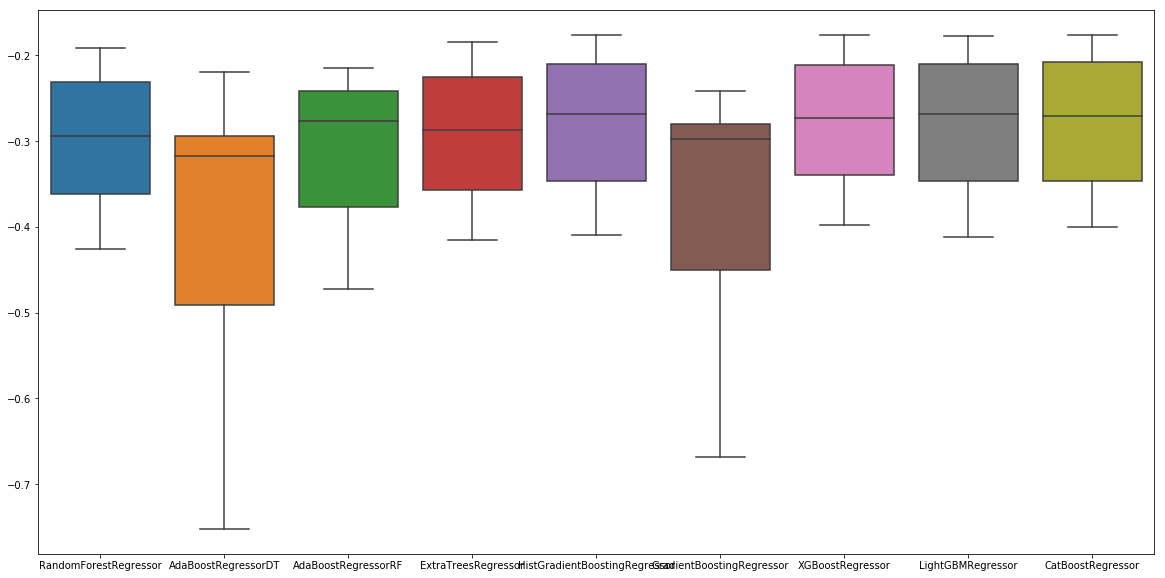

In [45]:
import seaborn as sns
plt.figure(figsize=(20, 10))
scores_map_emsemble = pd.DataFrame(scores_map_emsemble)
sns.boxplot(data=scores_map_emsemble)

In [50]:
#print(scores_map)
scores_map_emsemble = pd.DataFrame(scores_map)
scores_map_emsemble.head()

,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressorDT,AdaBoostRegressorRF,ExtraTreesRegressor,HistGradientBoostingRegressor,GradientBoostingRegressor,XGBoostRegressor,LightGBMRegressor,CatBoostRegressor
0,-0.315035,-0.276270,-0.298898,-0.267683,-0.274341,-0.252445,-0.280780,-0.258163,-0.252148,-0.254980
1,-0.483030,-0.363104,-0.485717,-0.321525,-0.358038,-0.345016,-0.448143,-0.339502,-0.343888,-0.347933
2,-0.725006,-0.425838,-0.752579,-0.395507,-0.415703,-0.409854,-0.668404,-0.397353,-0.412217,-0.399980
3,-0.340682,-0.312197,-0.297407,-0.285848,-0.299776,-0.285315,-0.299957,-0.288604,-0.285353,-0.287169
4,-0.549421,-0.414723,-0.532620,-0.472217,-0.411017,-0.399408,-0.518754,-0.397849,-0.397751,-0.400124


In [53]:
# Check the column name before and after
#print(list(scores_map.keys()))
dfscore = scores_map_emsemble.copy()
name1 = list(dfscore.columns.values)
print(name1)

['DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressorDT', 'AdaBoostRegressorRF', 'ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'GradientBoostingRegressor', 'XGBoostRegressor', 'LightGBMRegressor', 'CatBoostRegressor']


['DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressorDT', 'AdaBoostRegressorRF', 'ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'GradientBoostingRegressor', 'XGBoostRegressor', 'LightGBMRegressor', 'CatBoostRegressor']


In [54]:
# Rename the column name to shorter string
name2 = ['DT', 'RF', 'AB-DT', 'AB-RF', 'ET', 'HGB', 'GBM', 'XGB', 'LGBM', 'CB']
#name2 = ['CB', 'HGB', 'XGB', 'LGBM', 'GBM', 'AB-DT', 'RF']
dfscore.columns = name2
print(dfscore.columns.values)

['DT' 'RF' 'AB-DT' 'AB-RF' 'ET' 'HGB' 'GBM' 'XGB' 'LGBM' 'CB']


In [75]:
%matplotlib inline
plt.rc('xtick', labelsize=28) 
plt.rc('ytick', labelsize=28) 

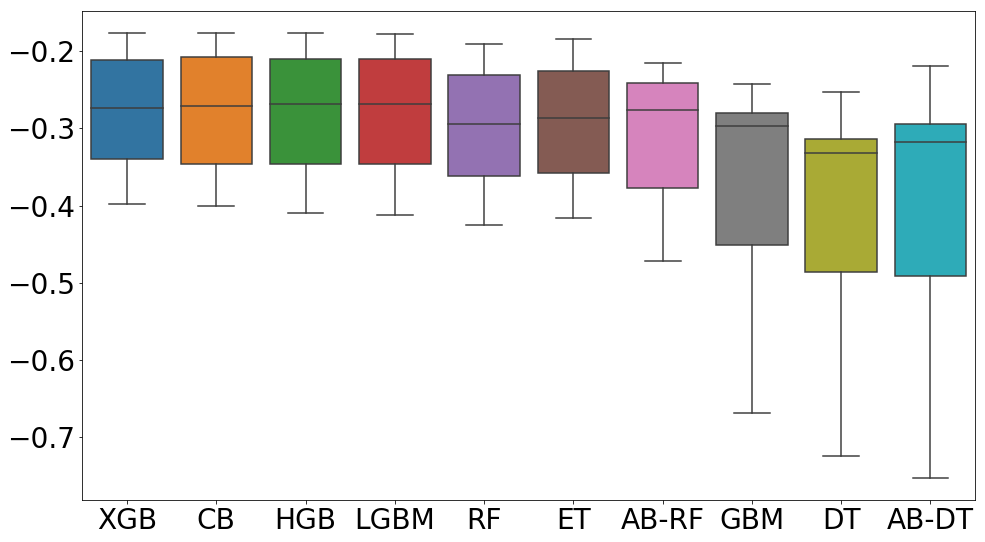

In [78]:
# Reorder the column for plot with certain order 
name3 = ['XGB', 'CB', 'HGB', 'LGBM', 'RF', 'ET', 'AB-RF', 'GBM', 'DT', 'AB-DT']
#name3 = ['RF', 'XGB', 'CB', 'LGBM', 'HGB', 'GBM', 'AB-DT']
dfnew = dfscore[name3] 
plt.figure(figsize=(16, 9))
sns.boxplot(data=dfnew)

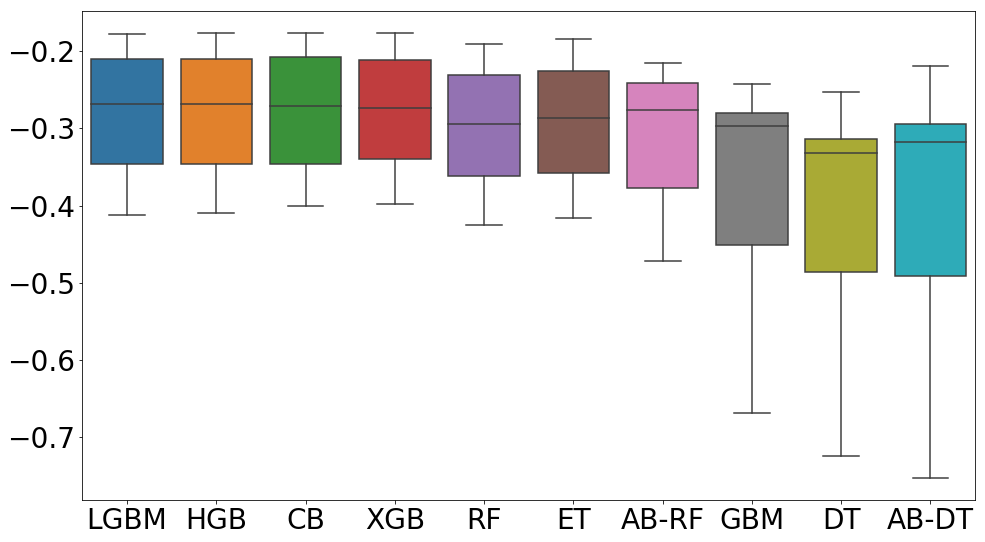

In [ ]:
name3 = ['GBM', 'AB-DT', 'LGBM', 'HGB', 'RF', 'AB-RT', 'CB', 'XGB', 'ET']
dfnew = dfscore[name3] 
plt.figure(figsize=(16, 9))
sns.boxplot(data=dfnew)

In [ ]:
plt.figure(figsize=(20, 10))
scores_mapA = pd.DataFrame(scores_mapA)
sns.boxplot(data=scores_mapA)

The models SVR and GradientBoostingRegressor show better performance with -11.62 (+/- 5.91) and -12.39 (+/- 5.86).

This is my first kernel and thanks to https://www.kaggle.com/vikrishnan for the dataset and the well writtten kernel that provdies great pointers into this dataset.